In [24]:
import numpy as np
import pandas as pd
import random
import math
from sklearn import datasets
import matplotlib.pyplot as plt


In [25]:
def dist(x0, y0, x1, y1):
    a = (x1 - x0)**2 + (y1 - y0)**2
    b = math.sqrt(a)
    return b

In [26]:
boston = datasets.load_boston()
dataDiferente = np.concatenate(([boston.data[:,1]],[boston.data[:,10]]))

data = np.zeros((len(dataDiferente[0]),2))

for dupla in range(len(dataDiferente[0])):
   data[dupla][0] = dataDiferente[0][dupla]
   data[dupla][1] = dataDiferente[1][dupla]

k = 3      #Elementos a comparar
Clas = 3   #Numero de classificações
porcentagem = 0.5

In [27]:
len(data)

506

In [28]:
target = np.zeros(len(data),dtype=int) 
for i in range(len(data)):
    if data[i][0] == 0:
        target[i] = 0 # baixa cr
    elif  (data[i][0] <= 50) and (data[i][0]>0):
        target[i] = 1 # Media cr
    elif  data[i][0] > 50:
        target[i] = 2 # alta cr
    

In [29]:
df = pd.DataFrame(data,columns=['DataX','DataY'])

df['Classificação'] = 4

porInd = int(len(target)*porcentagem)

In [30]:
for i in range(porInd):
    i1 = random.randint(0,len(target)-1)
    df.loc[i1,'Classificação'] = target[i1]

In [31]:
dif4 = pd.DataFrame()
df['Distancia'] = 0.0

In [32]:
for i in range(len(data)):
    x0 = data[i][0]
    y0 = data[i][1]
    if df.loc[i,'Classificação'] == 4:
        for j in range(len(df['DataX'])):
            x1 = data[j][0]
            y1 = data[j][0]
            if df.loc[j,'Classificação'] != 4:
                df.loc[j,'Distancia'] = dist(x0, y0, x1, y1)
        dif4 = pd.DataFrame(df[df.Classificação != 4])
        dif3 = pd.DataFrame(dif4.sort_values(['Distancia']))
        count = np.zeros(Clas,dtype=int)
        for x in range(k):
            for y in range(Clas):
                Clase = pd.DataFrame(dif3['Classificação'].head(x+1))
                ClasEle = Clase.iloc[0][0]
                if ClasEle == y:
                   count[y] += 1
                   break
        for x in range(Clas):
            countPass = 0
            countIGUAIS = 0
            for y in range(Clas):
                if count[x] > count[y]:
                    countPass +=1
                elif count[x] == count[y]:
                    countIGUAIS += 1
            if countPass == 2:
                df.loc[i,'Classificação'] = x
                break
            elif countIGUAIS == k:
                Clase = dif3['Classificação'].head(1)
                ClasEle = Clase.iloc[0][0]
                df.loc[i,'Classificação'] = ClasEle
                break


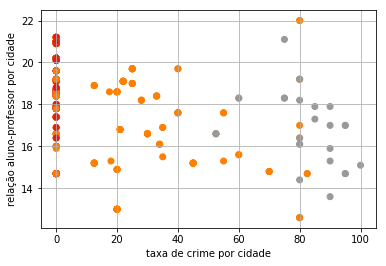

In [33]:
X = data[:, :2]  # as duas primeiras caracteristicas
y = df.Classificação
plt.subplots()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('taxa de crime por cidade')
plt.ylabel('relação aluno-professor por cidade')
plt.grid(True)
plt.show()
